## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

C:\Users\YOUNIS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## The DF-Test

In [6]:
sts.adfuller(df.market_value)

(-1.9041551418836862,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

## Using Returns

In [7]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Users\YOUNIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
sts.adfuller(df.returns)

(-12.770265719497312,
 7.798058336035586e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

## ACF and PACF for Returns

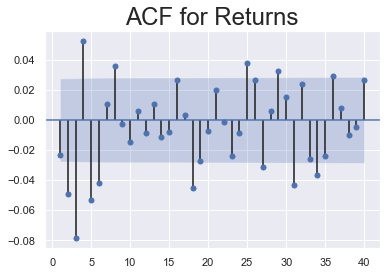

In [9]:
sgt.plot_acf(df.returns, lags=40 , zero=False)
plt.title("ACF for Returns", size = 24)
plt.show()

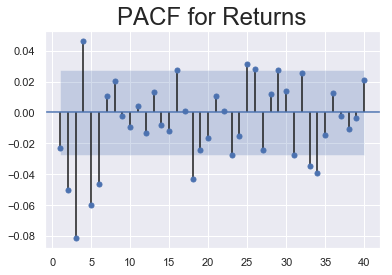

In [10]:
sgt.plot_pacf(df.returns, lags=40 , zero=False, method="ols")
plt.title("PACF for Returns", size = 24)
plt.show()

## AR(1) for Returns

In [11]:
model_ret_ar_1 = ARMA(df.returns, order=(1,0))

In [12]:
result_ret_ar_1 = model_ret_ar_1.fit()

In [13]:
result_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 11 Apr 2020   AIC                          15865.497
Time:                        14:49:10   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models for Returns

In [14]:
model_ret_ar_2 = ARMA(df.returns, order=(2,0))
result_ret_ar_2 = model_ret_ar_2.fit()
result_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 11 Apr 2020   AIC                          15854.911
Time:                        14:53:34   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [15]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [16]:
model_ret_ar_3 = ARMA(df.returns, order=(3,0))
result_ret_ar_3 = model_ret_ar_3.fit()
result_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sat, 11 Apr 2020   AIC                          15823.477
Time:                        14:55:47   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [17]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [19]:
model_ret_ar_4 = ARMA(df.returns, order=(4,0))
result_ret_ar_4 = model_ret_ar_4.fit()
print(result_ret_ar_4.summary())
print("LLR Test P-Value: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 11 Apr 2020   AIC                          15814.661
Time:                        14:58:49   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

In [20]:
model_ret_ar_5 = ARMA(df.returns, order=(5,0))
result_ret_ar_5= model_ret_ar_5.fit()
print(result_ret_ar_5.summary())
print("LLR Test P-Value: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 11 Apr 2020   AIC                          15798.779
Time:                        14:59:20   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

In [21]:
model_ret_ar_6 = ARMA(df.returns, order=(6,0))
result_ret_ar_6 = model_ret_ar_6.fit()
print(result_ret_ar_6.summary())
print("LLR Test P-Value: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 11 Apr 2020   AIC                          15789.890
Time:                        14:59:52   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

In [22]:
model_ret_ar_7 = ARMA(df.returns, order=(7,0))
result_ret_ar_7 = model_ret_ar_7.fit()
print(result_ret_ar_7.summary())
print("LLR Test P-Value: " + str(LLR_test(model_ret_ar_6, model_ret_ar_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 11 Apr 2020   AIC                          15791.294
Time:                        15:00:22   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     

## Normalizing Values

In [23]:
benchmark = df.market_value.iloc[0]

In [24]:
df["norm"] = df.market_value.div(benchmark).mul(100)

In [25]:
sts.adfuller(df.norm)

(-1.8928710132672304,
 0.3354222074330093,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [26]:
bench_ret = df.returns.iloc[0]
df["norm_ret"] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.77026571949723,
 7.798058336038551e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

## Normalized Returns

In [27]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order=(1,0))
result_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
print(result_norm_ret_ar_1.summary())


                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Sat, 11 Apr 2020   AIC                          80709.487
Time:                        15:28:46   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    

In [29]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order=(2,0))
result_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
print(result_norm_ret_ar_2.summary())


                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Sat, 11 Apr 2020   AIC                          80698.901
Time:                        15:36:36   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_ret    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0500      0.014

In [30]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order=(7,0))
result_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
print(result_norm_ret_ar_7.summary())


                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Sat, 11 Apr 2020   AIC                          80635.283
Time:                        15:37:55   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_ret    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_ret    -0.0517      0.014

## Analysing the Residuals

In [31]:
df['res_ret'] = result_ret_ar_6.resid

In [32]:
df.res_ret.mean()

-5.372069323730647e-05

In [33]:
df.res_ret.var()

1.355980211081412

In [34]:
sts.adfuller(df.res_ret)

(-70.7838020773852,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570833812997)

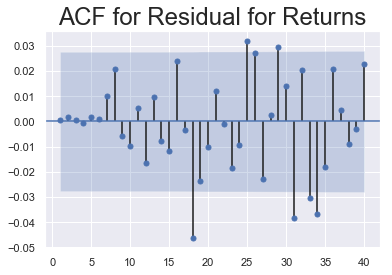

In [35]:
sgt.plot_acf(df.res_ret, lags=40 , zero=False)
plt.title("ACF for Residual for Returns", size = 24)
plt.show()

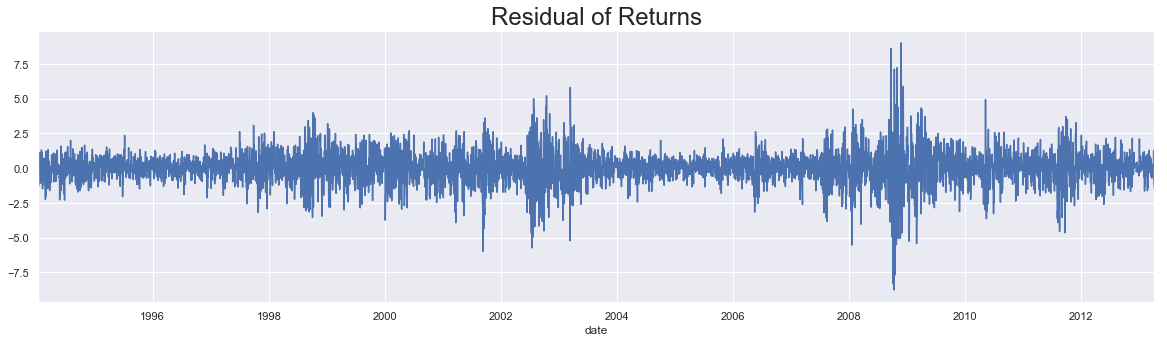

In [36]:
df.res_ret[1:].plot(figsize=(20,5))
plt.title("Residual of Returns", size= 24)
plt.show()